In [1]:
import numpy as np # array,matric
import pandas as pd #reading data,data structures 
import seaborn as sns #visulization
import matplotlib.pyplot as plt #plots
import warnings
warnings.filterwarnings("ignore")

# label encoder converts the categorical col into numerical col
from sklearn.preprocessing import LabelEncoder 
!pip install xgboost
from xgboost import XGBClassifier

# used to split the data into test and train parts
from sklearn.model_selection import train_test_split

# these models uses to find out how your model performs 
# supervised ml algo where predicted output is continous in nature and has a constant slope
from sklearn.linear_model import LinearRegression 
# D.T is used forr both classification and  regression problem, breaks data into multiple tree and predict (chance of "overfit" )
from sklearn.tree import DecisionTreeRegressor
# overfit can be overcomed 
from sklearn.ensemble import RandomForestRegressor

# not every model is not going to work in similar way, in order to compare how each is performed 
# we use these evaluation metrics 
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
df=pd.read_csv('data.csv',encoding='unicode_escape')
df.head()
#so2 (sulphur dioxide concentration) 
# no2 (nitrogen dioxide concentration)
# rspm (respirable suspended particualte matter concentration)
 # spm (suspended particulate matter) 
#pm2_5 (particulate matter 2.5) 

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df.shape          #rows,columns

(435742, 13)

In [4]:
df.info()        #overall info about dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.isnull().sum()      #total no of missing values in each column

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
df.describe()  #shows only numerical coumns

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

##### stn_code (station code) sampling_date (date of sample collection) state (Indian State) location (location of sample collection) 

##### agency type(type of area) so2 (sulphur dioxide concentration) no2 (nitrogen dioxide concentration)

##### rspm (respirable suspended particualte matter concentration) spm (suspended particulate matter) location_monitoring_station pm2_5 (particulate matter 2.5) date (date)

# Data visualization

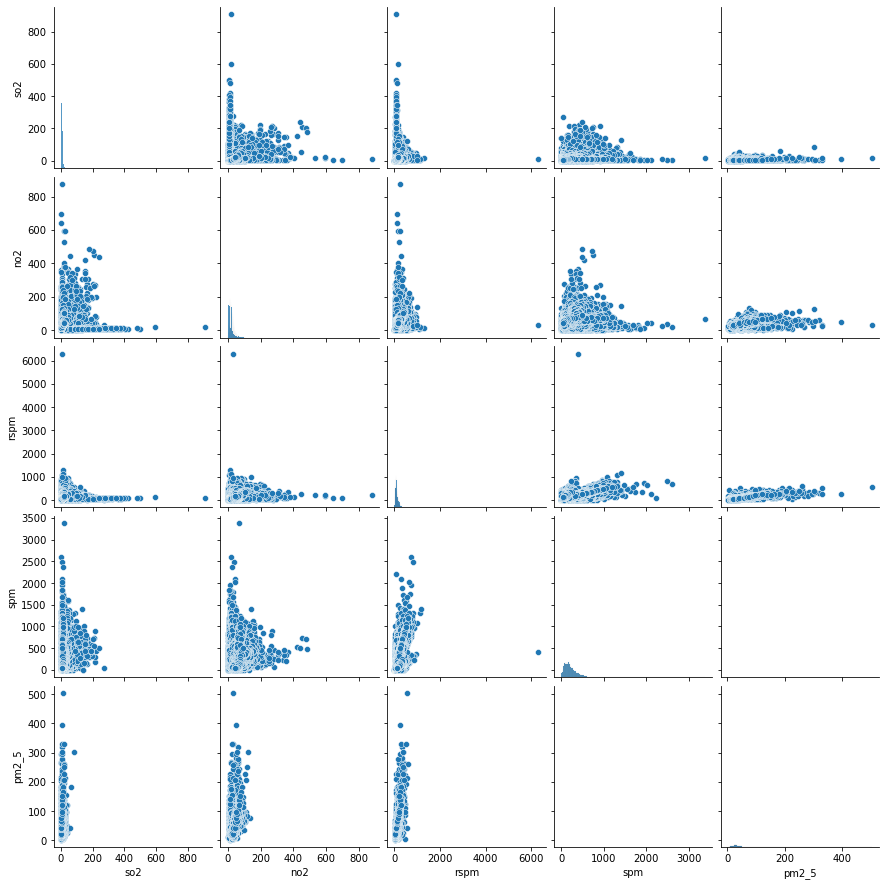

In [8]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='state', ylabel='so2'>

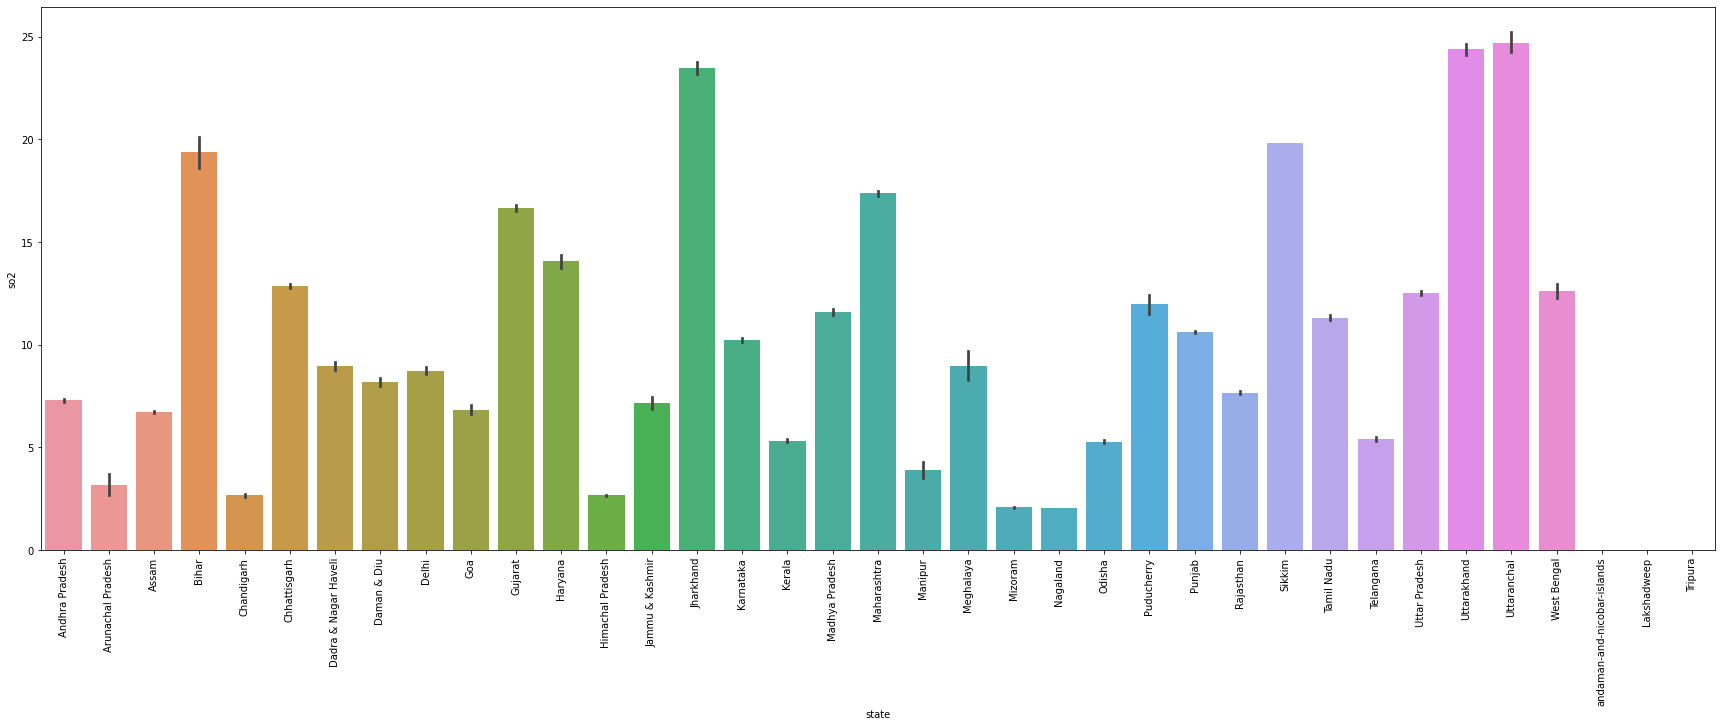

In [9]:
#this shows name of state having higher so2 levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

<AxesSubplot:xlabel='state', ylabel='no2'>

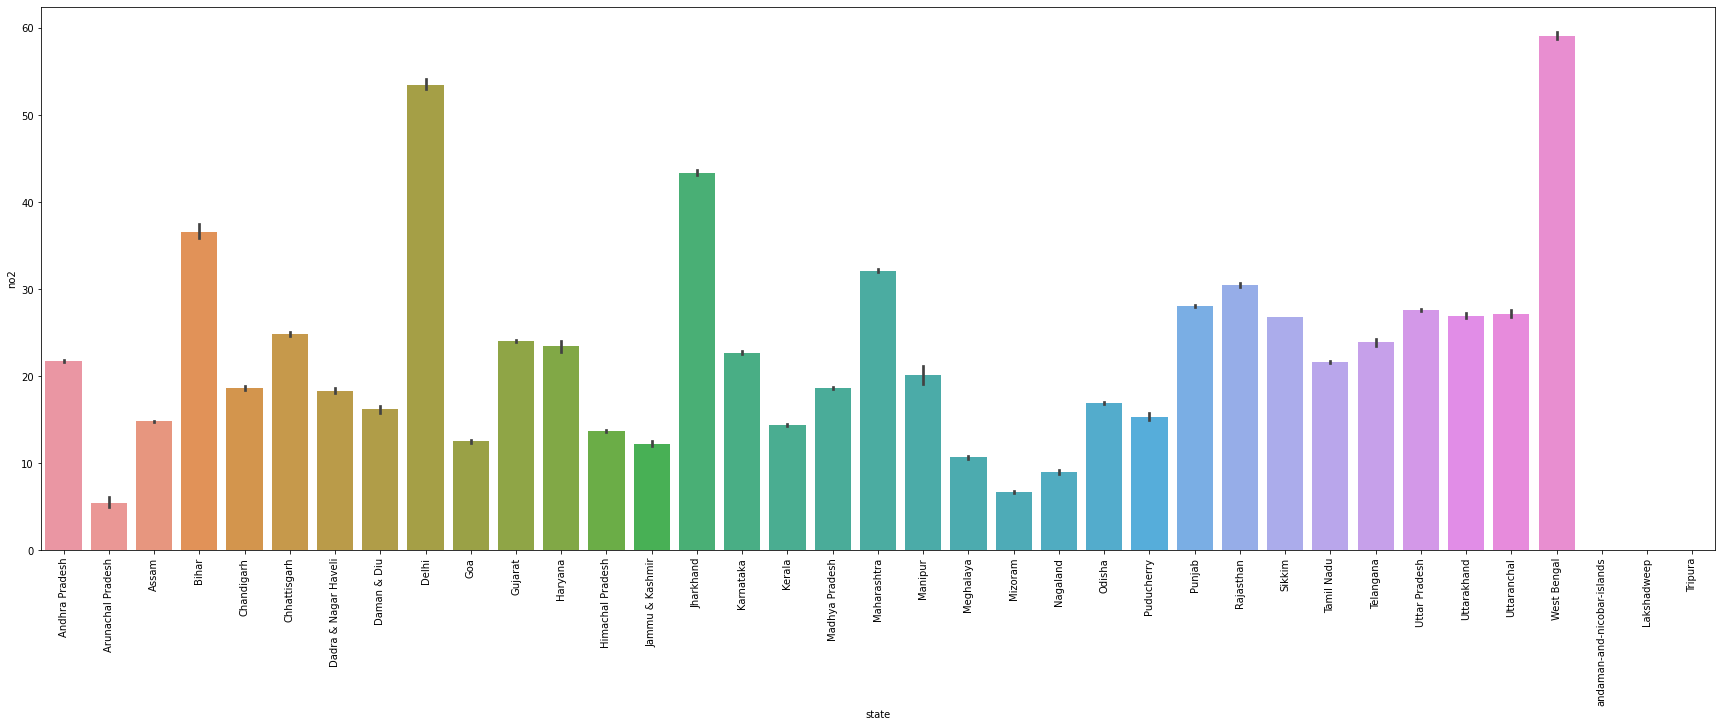

In [10]:
#this shows name of state having higher no2 levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)

<AxesSubplot:xlabel='state', ylabel='rspm'>

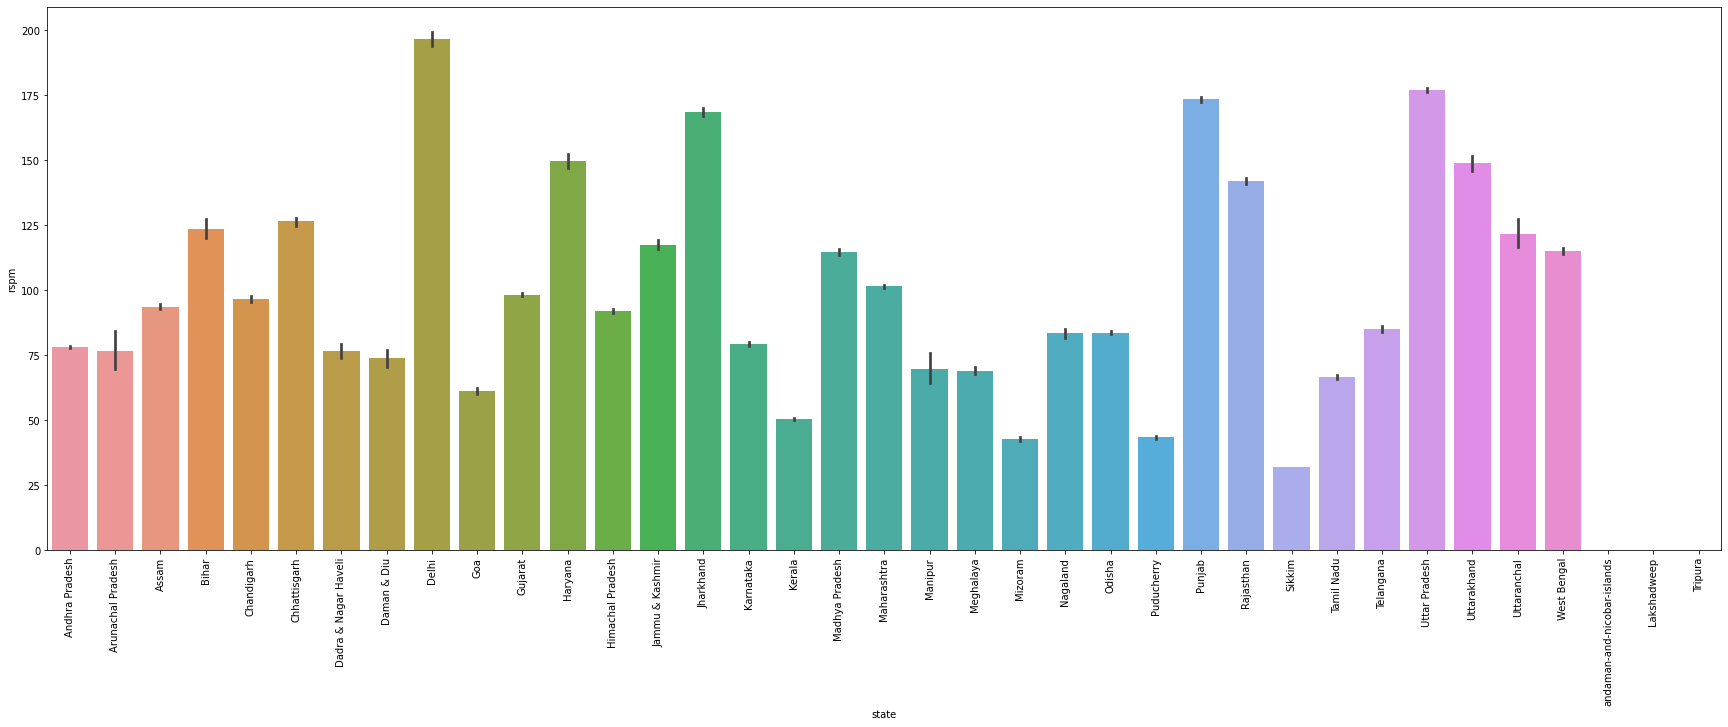

In [11]:
#this shows name of state having higher rspm levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)

<AxesSubplot:xlabel='state', ylabel='spm'>

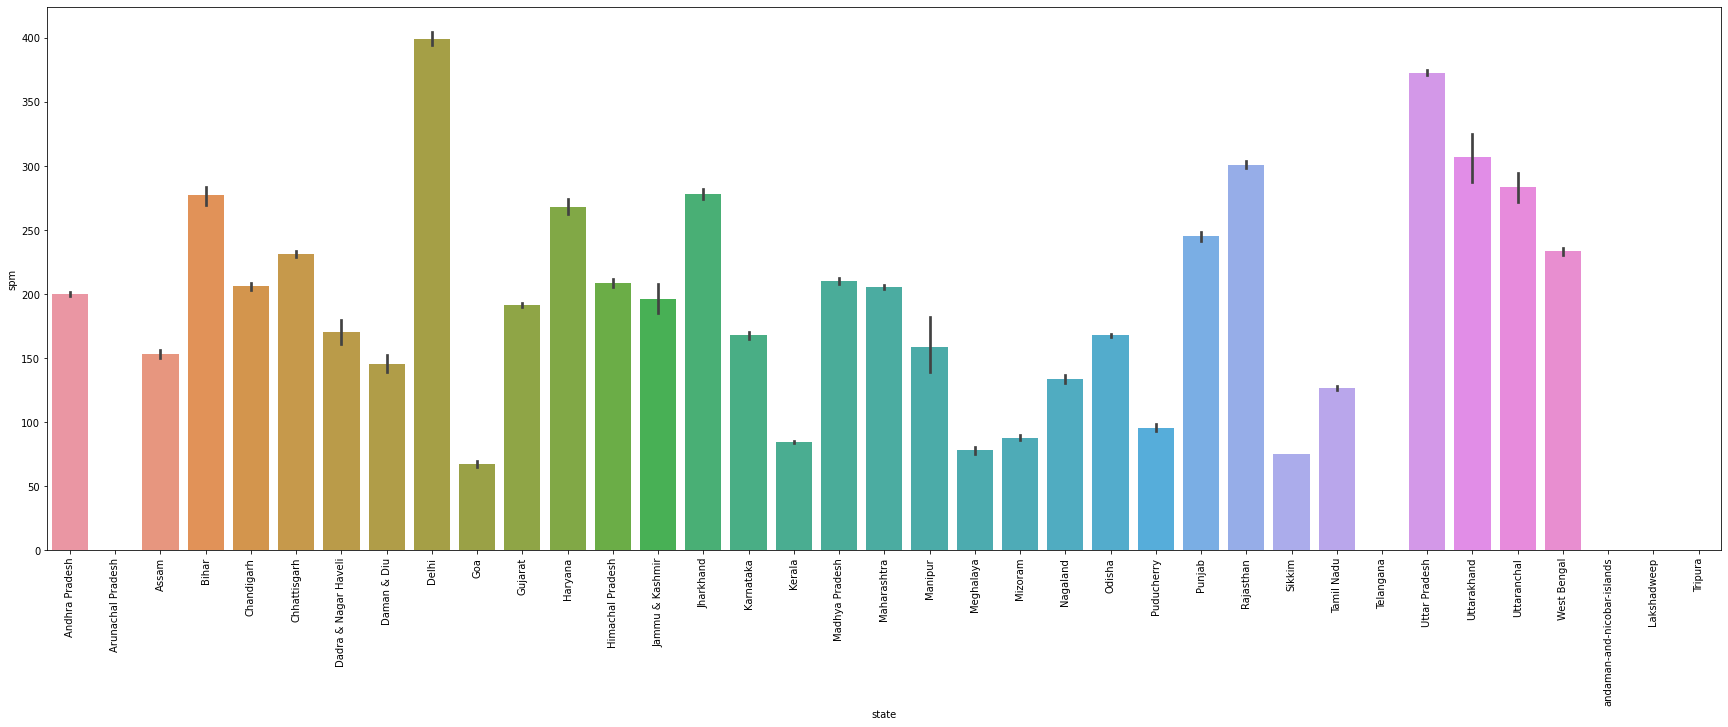

In [12]:
#this shows name of state having higher spm levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)

# preprocessing

In [13]:
#Finding missing values in the data set

nullvalues=df.isnull().sum().sort_values(ascending = False)


null_val_per = (df.isnull().sum()/df.isnull().count()* 100).sort_values(ascending = False)
miss_with_percent = pd.concat([nullvalues,null_val_per],axis=1,keys=['Total','Percent'])
miss_with_percent


,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


# data cleaning and feature extraction

In [14]:
#data cleaning
#dropping of unneccessary columns that are not helpful in decision making
df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)
print(df.columns)


Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')


In [15]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [16]:
#null value imputation for categorical data using mode
#state has no missing values

df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435742 non-null  object 
 2   type      435742 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [17]:
#gives statewise distribution of all the major pollutants i.e so2, no2, rspm, spm, pm2_5
df.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


In [18]:
#Missing values being filled in columns
#We will be using Imputation to fill in our missing values. 
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'date':
        guess_values = df.groupby('state')['date'].apply(lambda x: x.mode().max())
    elif col=='type':
        guess_values = df.groupby('state')['type'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('state')['location'].apply(lambda x: x.mode().max())
df.fillna(0,inplace=True)
df.head()
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64

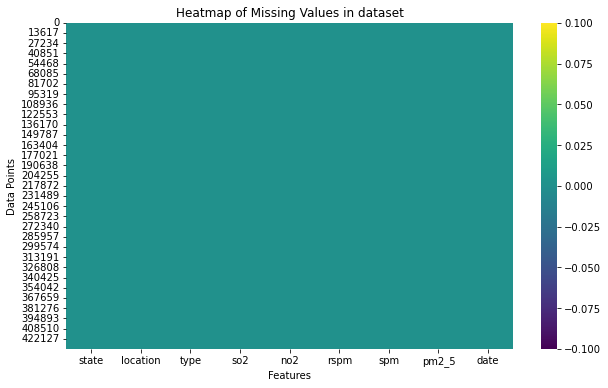

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values in dataset')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()


# calculate the air quality index (AQI) of every data value
# its is calculated as per indian govt standards


In [20]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards


#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['si']=df['so2'].apply(calculate_si)
data= df[['so2','si']]
print(data.head())


#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['ni']=df['no2'].apply(calculate_ni)
data= df[['no2','ni']]
print(data.head())

#Function to calculate rspm individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['rpi']=df['rspm'].apply(calculate_si)
data= df[['rspm','rpi']]
print(data.head())


#Function to calculate spm individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
df['spi']=df['spm'].apply(calculate_spi)
data= df[['spm','spi']]
print(data.head())


#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
data= df[['state','si','ni','rpi','spi','AQI']]
print(data.head())


   so2     si
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875
    no2      ni
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375
   rspm  rpi
0   0.0  0.0
1   0.0  0.0
2   0.0  0.0
3   0.0  0.0
4   0.0  0.0
   spm  spi
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
            state     si      ni  rpi  spi     AQI
0  Andhra Pradesh  6.000  21.750  0.0  0.0  21.750
1  Andhra Pradesh  3.875   8.750  0.0  0.0   8.750
2  Andhra Pradesh  7.750  35.625  0.0  0.0  35.625
3  Andhra Pradesh  7.875  18.375  0.0  0.0  18.375
4  Andhra Pradesh  5.875   9.375  0.0  0.0   9.375


In [21]:

#using threshold values to classify a particular values as good,moderate,poor,unhealthy,very,hazardous
def AQI_Range(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Moderate"
    elif x > 100 and x <= 200:
        return "Poor"
    elif x > 200 and x <= 300:
        return "Unhealthy"
    elif x > 300 and x <= 400:
        return "Very unhealthy"
    elif x > 400:
        return "Hazardous"
df['AQI_Range'] = df['AQI'].apply(AQI_Range)
print(df.head())

            state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5        date     si      ni  rpi  spi     AQI AQI_Range  
0   0.0  0.0    0.0  1990-02-01  6.000  21.750  0.0  0.0  21.750      Good  
1   0.0  0.0    0.0  1990-02-01  3.875   8.750  0.0  0.0   8.750      Good  
2   0.0  0.0    0.0  1990-02-01  7.750  35.625  0.0  0.0  35.625      Good  
3   0.0  0.0    0.0  1990-03-01  7.875  18.375  0.0  0.0  18.375      Good  
4   0.0  0.0    0.0  1990-03-01  5.875   9.375  0.0  0.0   9.375      Good  


In [22]:
df['AQI_Range'].value_counts()

Poor              222235
Moderate          102871
Good               42576
Unhealthy          33510
Hazardous          18701
Very unhealthy     15849
Name: AQI_Range, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='year', ylabel='AQI'>

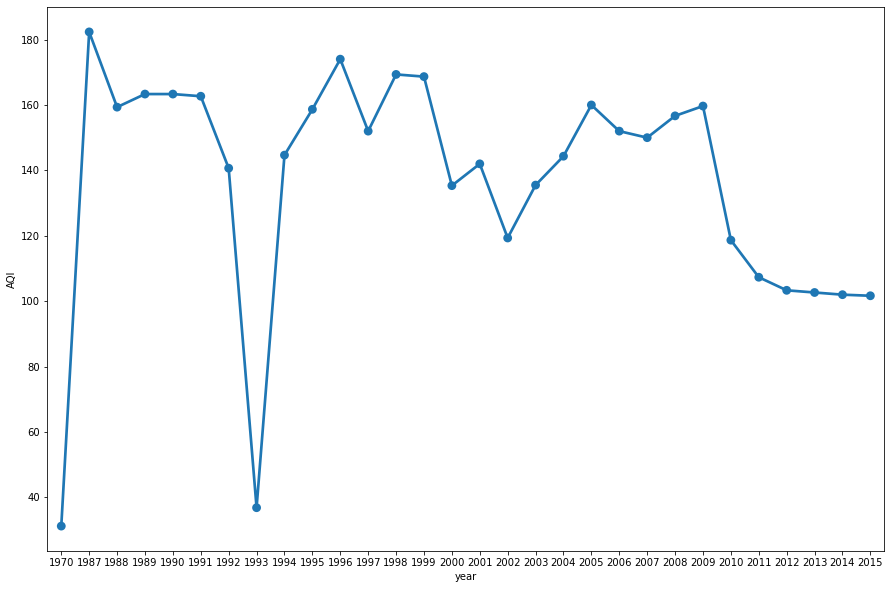

In [23]:
#Exploratory Data Analysis
#Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.
#Visualization of AQI across india (Year-wise)

df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]
data = df[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=data)

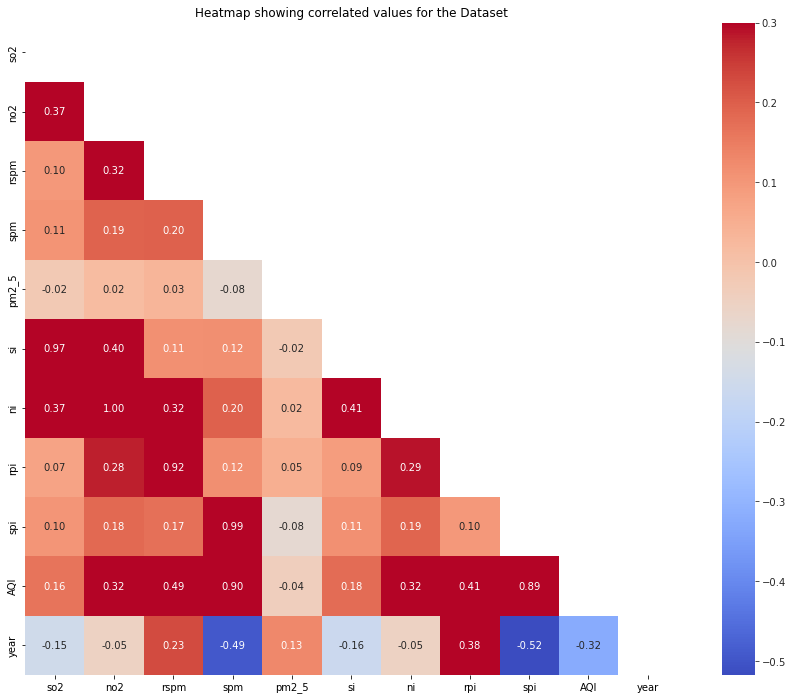

In [24]:
#Visual representation in form of heatmap for correlated data
#correlation

dataset=df
dataset.corr()
plt.figure(figsize=(16,12))
ax=plt.axes()
#sns.heatmap(data=fifa_dataset.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
mask = np.zeros_like(dataset.iloc[:,:].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=dataset.iloc[:,:].corr(), mask=mask, vmax=.3, annot=True,fmt='.2f', square=True, cmap='coolwarm')
    
ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()

#red color shows highly correlated
#blure are less correleated

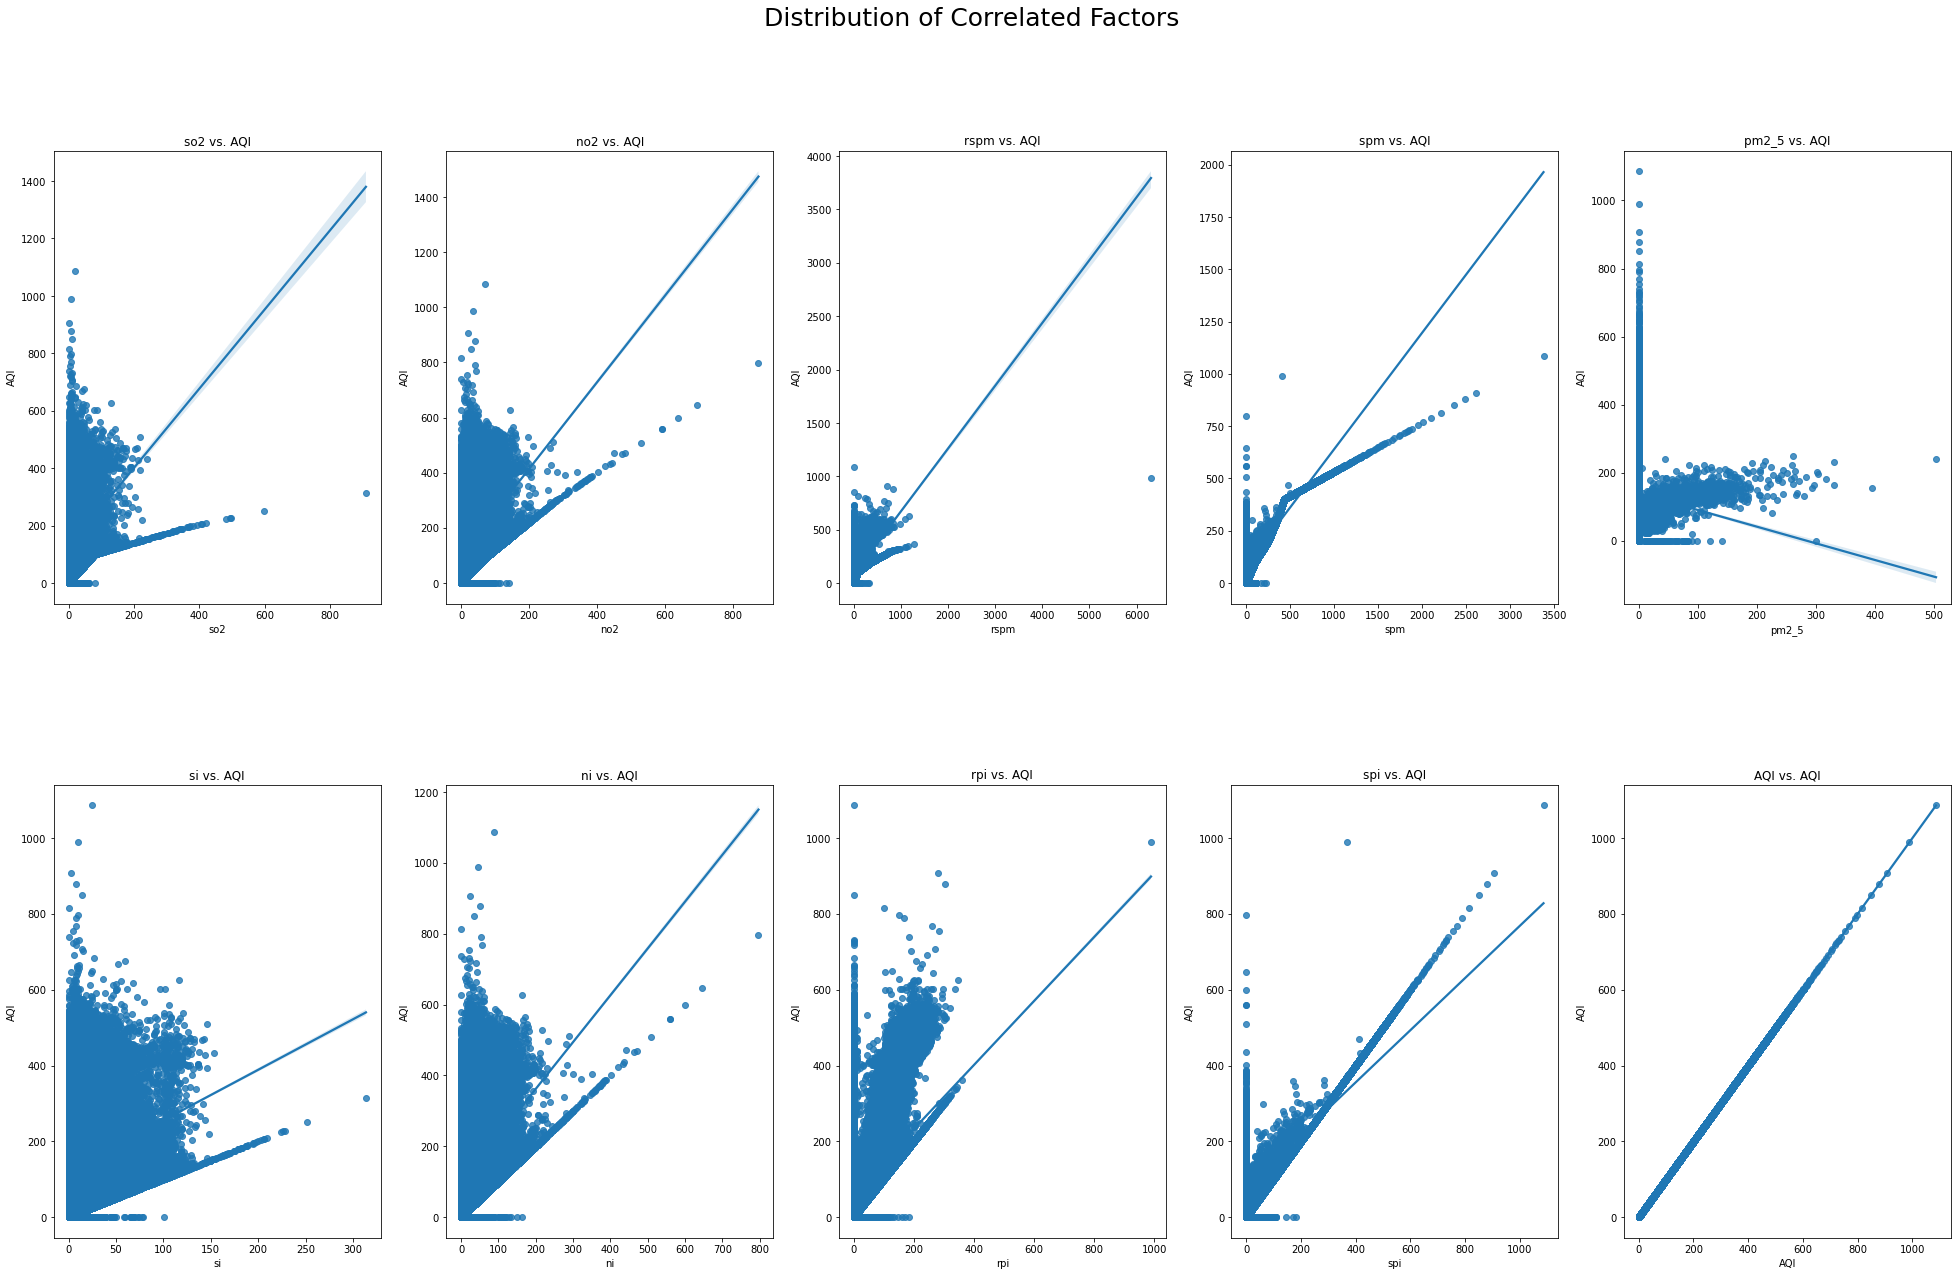

In [25]:
# Assuming you have imported the necessary libraries and have a DataFrame named 'df'

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(34, 20))
plt.subplots_adjust(hspace=0.4)

# Create an empty DataFrame 'z' to store relevant columns
z = pd.DataFrame()

for col in df.columns.values[3:15]:
    if col not in ['state', 'location', 'type', 'date', 'year', 'state_label', 'type_label']:
        z[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handling errors

        
# Include the 'AQI' column
z['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

for i in range(2):
    for j in range(5):
        # Extract column names for x-axis and y-axis
        x_label = z.columns[i * 5 + j]
        y_label = 'AQI'
        # Plot regression plot
        sns.regplot(data=z, x=x_label, y=y_label, ax=axes[i, j])
        axes[i, j].set_title(f'{x_label} vs. {y_label}')

# Regplot : Distribution of important independent variables and their relation with dependent variable i.e AQI
fig.suptitle('Distribution of Correlated Factors', fontsize=25)
plt.show()


In [26]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,AQI,AQI_Range,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,6.000,21.750,0.000000,0.0,21.750000,Good,1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,3.875,8.750,0.000000,0.0,8.750000,Good,1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,7.750,35.625,0.000000,0.0,35.625000,Good,1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,7.875,18.375,0.000000,0.0,18.375000,Good,1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,5.875,9.375,0.000000,0.0,9.375000,Good,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24,27.500,62.500,121.000000,0.0,121.000000,Poor,2015
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,2015-12-29,25.000,57.500,130.333333,0.0,130.333333,Poor,2015
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,1970-01-01,0.000,0.000,0.000000,0.0,0.000000,Good,1970
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,1970-01-01,0.000,0.000,0.000000,0.0,0.000000,Good,1970


# spliting the dataset into dependent and Independent columns

In [27]:
X= df[['si','ni','rpi','spi']]
Y=df['AQI']

print(X.head())
print('_________')

print(Y.head()) #AQI is the target column


      si      ni  rpi  spi
0  6.000  21.750  0.0  0.0
1  3.875   8.750  0.0  0.0
2  7.750  35.625  0.0  0.0
3  7.875  18.375  0.0  0.0
4  5.875   9.375  0.0  0.0
_________
0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64


## slipting the data into train and test

In [28]:
#slipting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape )


(305019, 4) (130723, 4) (305019,) (130723,)


## Regression models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=70)

# Create instances of regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("------------------------------------------")
    
# Lower values for MSE, MAE, and RMSE indicate better model performance.
# Higher values for R2 indicate better model fit, with 1 being the best possible fit.

Linear Regression Metrics:
Mean Squared Error (MSE): 760.2675744898081
R-squared (R2): 0.9118230315070704
Mean Absolute Error (MAE): 20.87533423793413
Root Mean Squared Error (RMSE): 27.57295005054425
------------------------------------------
Lasso Regression Metrics:
Mean Squared Error (MSE): 760.2905909586892
R-squared (R2): 0.9118203620226423
Mean Absolute Error (MAE): 20.881137794617455
Root Mean Squared Error (RMSE): 27.573367421457416
------------------------------------------
Decision Tree Metrics:
Mean Squared Error (MSE): 4.97452977262624
R-squared (R2): 0.9994230466091858
Mean Absolute Error (MAE): 0.0889857056397778
Root Mean Squared Error (RMSE): 2.2303653899364204
------------------------------------------
Random Forest Metrics:
Mean Squared Error (MSE): 2.993622783142076
R-squared (R2): 0.9996527951596437
Mean Absolute Error (MAE): 0.08589584232431266
Root Mean Squared Error (RMSE): 1.7302088842512848
------------------------------------------
K-Nearest Neighbors Metrics

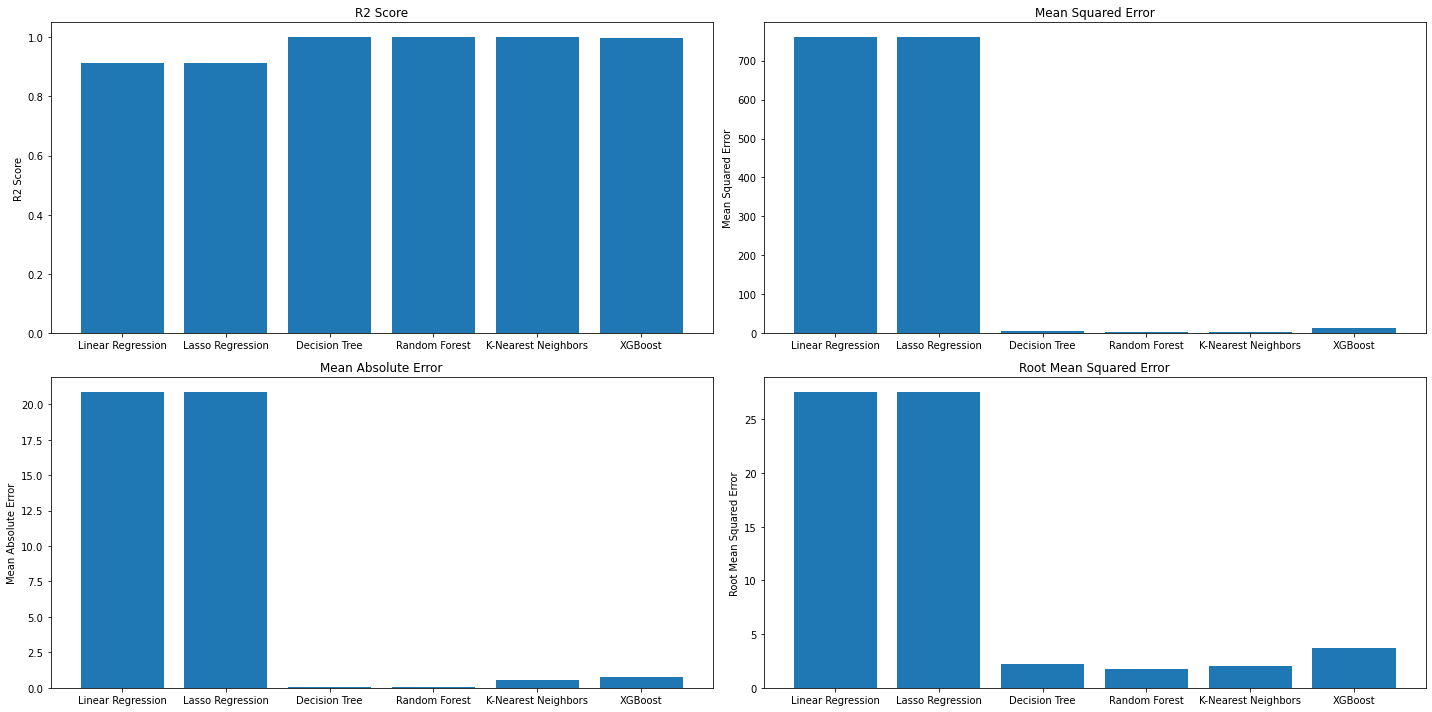

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return r2, mse, mae, rmse


# Assuming you already have the trained models stored in the 'regression_models' dictionary
performance_metrics = {}

for name, model in regression_models.items():
    r2, mse, mae, rmse = evaluate_model(model, X_test, Y_test)
    performance_metrics[name] = {'R2 Score': r2, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Root Mean Squared Error': rmse}
    
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

metrics = list(performance_metrics.values())[0].keys()
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    ax.bar(performance_metrics.keys(), [metric_dict[metric] for metric_dict in performance_metrics.values()])
    ax.set_title(metric)
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()


## classification models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

label_encoder = LabelEncoder()

# Split the data into dependent and independent columns for classification
X2 = df[['si', 'ni', 'rpi', 'spi']]
Y2 = df['AQI_Range']

# Convert the target variable to numerical labels
Y2_encoded = label_encoder.fit_transform(Y2)

# Split the data into train and test for classification
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2_encoded, test_size=0.1, random_state=70)
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

# Create instances of classification models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'GNB': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),

}

my_metrics = {}
for name, model in classification_models.items():
    model.fit(X_train2, Y_train2)
    y_pred2 = model.predict(X_test2)
    accuracy = accuracy_score(Y_test2, y_pred2)
    precision = precision_score(Y_test2, y_pred2, average='weighted')
    recall = recall_score(Y_test2, y_pred2, average='weighted')
    f1 = f1_score(Y_test2, y_pred2, average='weighted')

    my_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("------------------------------------------")


(392167, 4) (43575, 4) (392167,) (43575,)
Logistic Regression Metrics:
Accuracy: 0.58815834767642
Precision: 0.561564224892936
Recall: 0.58815834767642
F1 Score: 0.5387517934106153
------------------------------------------
Naive Bayes Metrics:
Accuracy: 0.8590476190476191
Precision: 0.8600158908615956
Recall: 0.8590476190476191
F1 Score: 0.8583823319185386
------------------------------------------
Decision Tree Metrics:
Accuracy: 0.9995639701663798
Precision: 0.9995639988462808
Recall: 0.9995639701663798
F1 Score: 0.999563977108825
------------------------------------------
Random Forest Metrics:
Accuracy: 0.9996328169822146
Precision: 0.9996329470965221
Recall: 0.9996328169822146
F1 Score: 0.9996326054682686
------------------------------------------
AdaBoost Metrics:
Accuracy: 0.7067125645438899
Precision: 0.6413750249852302
Recall: 0.7067125645438899
F1 Score: 0.652937511123679
------------------------------------------
KNN Metrics:
Accuracy: 0.9917842799770511
Precision: 0.991788

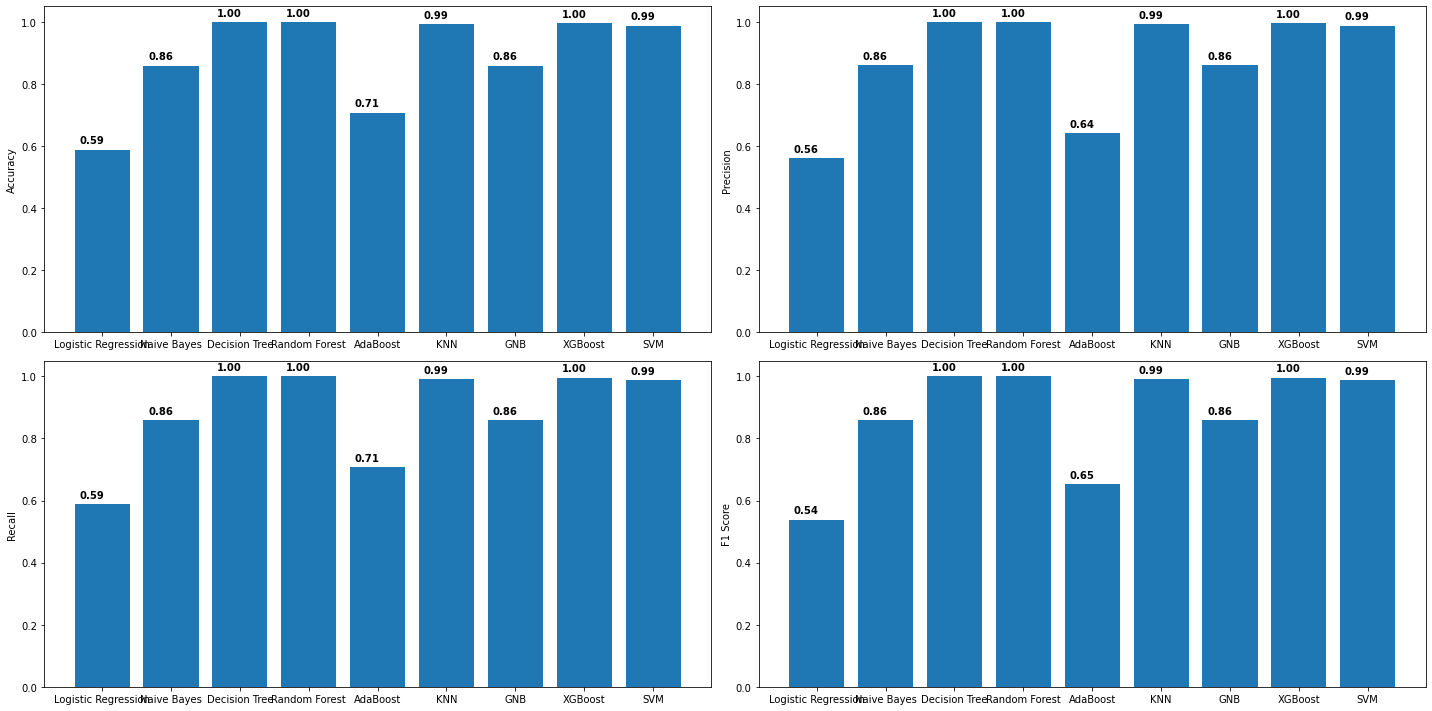

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Assuming you already have the trained models stored in the 'classification_models' dictionary
classification_performance_metrics = {}

for name, model in classification_models.items():
    accuracy, precision, recall, f1 = evaluate_classification_model(model, X_test2, Y_test2)
    classification_performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

metrics = list(classification_performance_metrics.values())[0].keys()
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    values = [metric_dict[metric] for metric_dict in classification_performance_metrics.values()]
    labels = [f"{value:.2f}" for value in values]  # Format numeric values
    
    bars = ax.bar(classification_performance_metrics.keys(), values)
    
    for bar, label in zip(bars, labels):
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, label, ha='center', color='black', fontweight='bold')

    ax.set_ylabel(metric)
    
plt.tight_layout()
plt.show()


# higher accuracy indicates a better overall performance.
# higher precision means that when the model predicts positive, it is more likely to be correct.
#  A higher recall means that the model is better at capturing all positive instances.
#  A higher F1 score indicates a good balance between precision and recall.

## base paper metrics

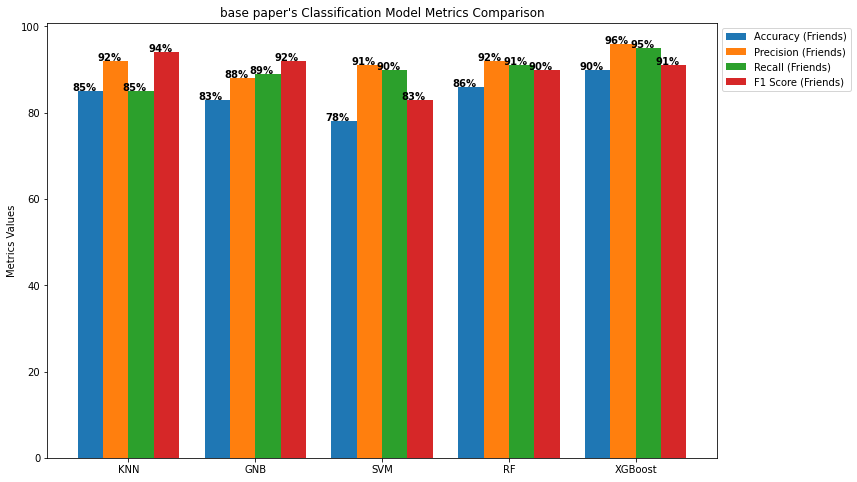

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Friend's metrics
base_paper_metrics = {
    'KNN': {'Accuracy': 85, 'Precision': 92, 'Recall': 85, 'F1 Score': 94},
    'GNB': {'Accuracy': 83, 'Precision': 88, 'Recall': 89, 'F1 Score': 92},
    'SVM': {'Accuracy': 78, 'Precision': 91, 'Recall': 90, 'F1 Score': 83},
    'RF': {'Accuracy': 86, 'Precision': 92, 'Recall': 91, 'F1 Score': 90},
    'XGBoost': {'Accuracy': 90, 'Precision': 96, 'Recall': 95, 'F1 Score': 91},
}

# Extract the metric values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_values_friends = {metric: [base_paper_metrics[model][metric] for model in base_paper_metrics] for metric in metrics_names}

# Model names
models_friends = list(base_paper_metrics.keys())

# Bar width
bar_width = 0.2
bar_positions = np.arange(len(models_friends))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the metrics for each model
for i, metric_name in enumerate(metrics_names):
    bars = ax.bar(bar_positions + i * bar_width, metric_values_friends[metric_name], width=bar_width, label=f"{metric_name} (Friends)")

    # Add the numeric values on top of each bar
    for bar, value in zip(bars, metric_values_friends[metric_name]):
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f"{value}%", ha='center', color='black', fontweight='bold')

ax.set_xticks(bar_positions + bar_width * (len(metrics_names) - 1) / 2)
ax.set_xticklabels(models_friends)
ax.set_ylabel('Metrics Values')
ax.set_title('base paper\'s Classification Model Metrics Comparison')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


## models comparision b/w basepaper and present models

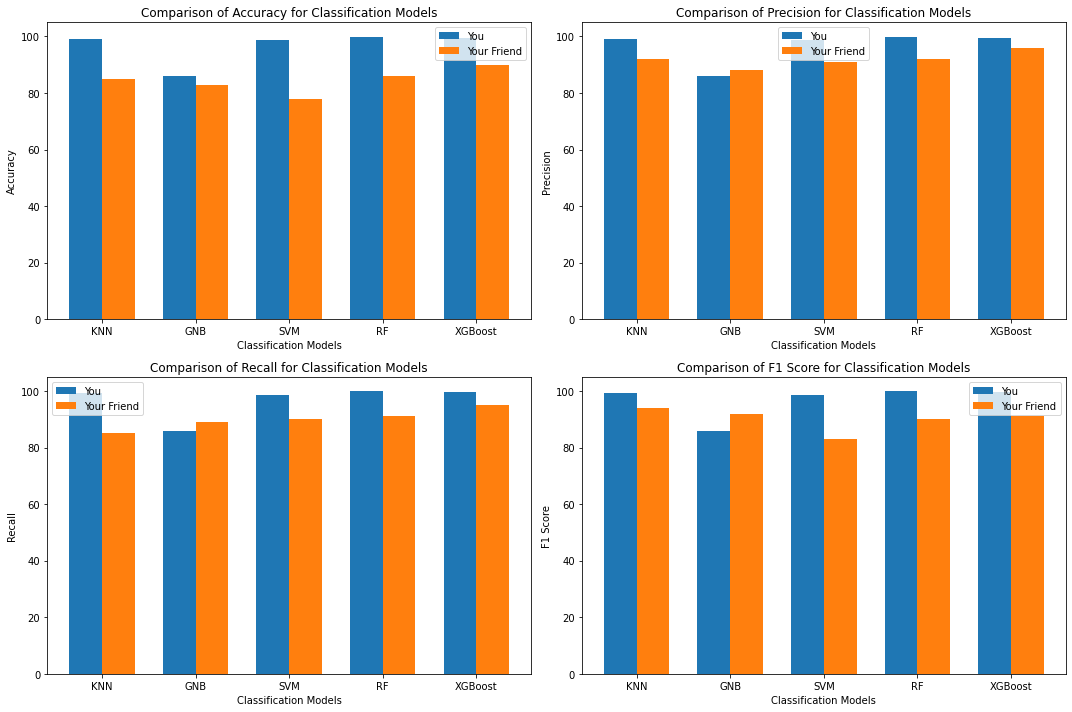

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Your metrics
my_metrics = {
    'KNN': {'Accuracy': 99.18, 'Precision': 99.18, 'Recall': 99.18, 'F1 Score': 99.18},
    'GNB': {'Accuracy': 85.90, 'Precision': 86.00, 'Recall': 85.90, 'F1 Score': 85.84},
    'SVM': {'Accuracy': 98.69, 'Precision': 98.69, 'Recall': 98.69, 'F1 Score': 98.69},
    'RF': {'Accuracy': 99.97, 'Precision': 99.97, 'Recall': 99.97, 'F1 Score': 99.97},
    'XGBoost': {'Accuracy': 99.56, 'Precision': 99.56, 'Recall': 99.56, 'F1 Score': 99.56},
}

# Your friend's metrics
base_paper_metrics = {
    'KNN': {'Accuracy': 85, 'Precision': 92, 'Recall': 85, 'F1 Score': 94},
    'GNB': {'Accuracy': 83, 'Precision': 88, 'Recall': 89, 'F1 Score': 92},
    'SVM': {'Accuracy': 78, 'Precision': 91, 'Recall': 90, 'F1 Score': 83},
    'RF': {'Accuracy': 86, 'Precision': 92, 'Recall': 91, 'F1 Score': 90},
    'XGBoost': {'Accuracy': 90, 'Precision': 96, 'Recall': 95, 'F1 Score': 91},
}

# Metrics to compare (e.g., 'Accuracy', 'Precision', 'Recall', 'F1 Score')
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through each metric
for i, metric in enumerate(metrics_to_compare):
    # Extract values for your metrics, handling None values
    my_values = [my_metrics[model][metric] if my_metrics[model][metric] is not None else 0.0 for model in my_metrics]

    # Extract values for your friend's metrics
    friends_values = [base_paper_metrics[model][metric] for model in my_metrics]

    # Bar width
    bar_width = 0.35

    # Set up the figure and axis
    index = np.arange(len(my_metrics))

    # Plot your metrics
    bar1 = axes[i//2, i%2].bar(index, my_values, bar_width, label='You')

    # Plot your friend's metrics
    bar2 = axes[i//2, i%2].bar(index + bar_width, friends_values, bar_width, label='Your Friend')

    # Add labels, title, and legend for each subplot
    axes[i//2, i%2].set_xlabel('Classification Models')
    axes[i//2, i%2].set_ylabel(metric)
    axes[i//2, i%2].set_title(f'Comparison of {metric} for Classification Models')
    axes[i//2, i%2].set_xticks(index + bar_width / 2)
    axes[i//2, i%2].set_xticklabels(list(my_metrics.keys()))
    axes[i//2, i%2].legend()

# Adjust layout for subplots
plt.tight_layout()

# Display the plot
plt.show()


In [35]:

classification_models
# import joblib
# joblib.dump(classification_models[3], "savedmodel.sav")
# model = joblib.load('savedmodel.sav' )

{'Logistic Regression': LogisticRegression(),
 'Naive Bayes': GaussianNB(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'KNN': KNeighborsClassifier(),
 'GNB': GaussianNB(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tr

In [52]:
import pickle

# Save the RandomForest model using pickle
rf_model = regression_models['Random Forest']

with open('savedmodel.sav', 'wb') as file:
    pickle.dump(rf_model, file)

# Load the RandomForest model using pickle
with open('savedmodel.sav', 'rb') as file:
    loaded_rf_model = pickle.load(file)

In [53]:
loaded_rf_model.predict([[0,68,1.1111,10.0]])[0]

67.965